In [ ]:
Fake News Detection With 99% Accuracy:
    
Objectives

To build a model that will be able to determine if an article is fake news or not.

Data Understanding

The data was obtained from kaggle Fake and real news dataset. 
There are two sets of data, both saved in CSV format. One dataset contains real news, 
while the other dataset contains false news.


In [1]:
# Importing module to load data
import pandas as pd

In [2]:
# Loading the datasets
fake = pd.read_csv(r'C:\Users\Intel\Downloads\Fake.csv')
real = pd.read_csv(r'C:\Users\Intel\Downloads\True.csv')

In [25]:
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [26]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [3]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
real.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [10]:
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [5]:
real.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [29]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [34]:
# Checking for duplicated in the fake news dataset
fake.duplicated().sum()

1

In [35]:
# Dropping the duplicated in the fake news dataset
fake.drop_duplicates(inplace=True)

In [36]:
# Checking for duplicated in the real news dataset
real.duplicated().sum()

206

In [17]:
# Dropping the duplicated in the real news dataset
real.drop_duplicates(inplace=True)

In [ ]:
Data Preparation
In this section, i am going to do the following tasks using Python and NLP libraries:

Check for duplicate values in the data and remove them if any are found.
Combine two datasets into one.
Dropping columns not to be used.
Remove all punctuations.
Convert all the text to lower case.
Create a word cloud.
Remove stopwords from the combined dataset.
Lemmatize the text data.
Split the data into training and testing set.
Tokenize the text data.

In [7]:
# Creating a new column in both dataset that identifies a row has real news or fake
# 0-real news
# 1- fake news
real['category'] = 0
fake['category'] = 1

In [8]:
# Combining the two datasets
news = pd.concat([real,fake],axis=0,ignore_index=True)
# previewing the new dataset
news.head()

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [39]:
# Dropping columns not to be used
news.drop(['title','subject','date'],axis=1,inplace=True)

In [40]:
# Removing all punctuations
import re    # 're' -- regular expression Python provides a set of functions that allow you to search, 
#manipulate and process text using regular expressions. Regular expressions are patterns used to match and manipulate text.
news['text'] = news['text'].map(lambda x: re.sub('[-,\.!?]', '', x))

In [9]:
# Converting the text data to lower case
news['text'] = news['text'].map(lambda x: x.lower())

In [ ]:
pip install wordcloud


In [ ]:
## WordCloud is a Python module used to create word clouds from a text. It is an open-source software
## library designed for creating visual representations of text data. Word clouds are a graphical representation 
## of the frequency of words in a text document, where the size of each word represents its frequency or importance in the text

In [11]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Intel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


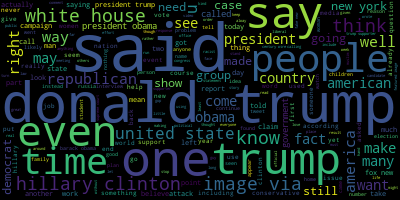

In [13]:
# Importing the necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud

# Loading the news dataset
fake = pd.read_csv(r'C:\Users\Intel\Downloads\Fake.csv')

# Preprocessing the text data
stop_words = set(stopwords.words('english'))
processed_text = []
for article in fake['text']:
    words = nltk.word_tokenize(article)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    processed_text.append(' '.join(words))

# Joining the processed text together
long_string = ' '.join(processed_text)

# Creating a WordCloud object
wordcloud = WordCloud()

# Generating the word cloud
wordcloud.generate(long_string)

# Visualizing the word cloud
wordcloud.to_image()


In [29]:
####  python -m spacy download en_core_web_sm  

### if we not install --error will come- so  the 'en_core_web_sm' model is not installed in your spaCy library. 
###You can try installing it by running the following command in your terminal or Anaconda prompt:  python -m spacy download en_core_web_sm 

In [14]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [ ]:
## Spacy is an open-source software library for advanced natural language processing (NLP) tasks in Python.
## It is designed specifically for production use and helps you build applications that
### process and "understand" large volumes of text data.


In [16]:
import spacy
import pandas as pd

# Create a pandas DataFrame with a "text" column containing some text
fake = pd.DataFrame({'text': ['This is some fake news.', 'More fake news here.']})

# loading the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Parsing the text with Spacy
    doc = nlp(text)
    
    # Lemmatizing the tokens and remove stop words
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    
    # Joining the lemmas back into a string and return it
    return " ".join(lemmas)

# applying the preprocess_text function to the text column
fake['text'] = fake['text'].apply(preprocess_text)

In [48]:
import spacy

# loading the English language model in spaCy
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    # Parsing the text with Spacy
    doc = nlp(text)
    
    # Lemmatizing the tokens and remove stop words
    lemmas = [token.lemma_ for token in doc if not token.is_stop]
    
    # Joining the lemmas back into a string and return it
    return " ".join(lemmas)

# applying the preprocess_text function to the text column
news['text'] = news['text'].apply(preprocess_text)

In [17]:
print(fake.columns)

### to define the  columns.

Index(['text'], dtype='object')


In [18]:
# Loading splitting library
from sklearn.model_selection import train_test_split

# Defining the independent variable
X = news['text']

# Defining the dependent variable
y = news['category']

# Splitting the data into training and testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [19]:
# Loading count vectorizer library
from sklearn.feature_extraction.text import CountVectorizer

# Instantiating count vectorizer
cv = CountVectorizer()

# Fitting and transforming X train 
X_train_vect = cv.fit_transform(X_train)

# Tranforming X test
X_test_vect = cv.transform(X_test)

In [59]:
#Modeling
#I will utilize binary classification models
#to determine which one can effectively predict whether news articles are true or fake with high accuracy.

#Logistic Regression


In [22]:
 # Loading libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Instantiating logistic regression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_vect,y_train)

# Predicting the value of y_train using the model
y_pred_train = logreg.predict(X_train_vect)

# Predicting the value of y_test using the model
y_pred_test = logreg.predict(X_test_vect)


# Accuracy of the training and testing data
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
print(f'Train accuracy - {train_accuracy} \nTest accuracy - {test_accuracy}')

Train accuracy - 0.9999721588061696 
Test accuracy - 0.9961024498886414


C:\Users\Intel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# Classification report for training data
categories=['real','fake']
print(classification_report(y_train,y_pred_train,target_names=categories,digits=4))

              precision    recall  f1-score   support

        real     1.0000    0.9999    1.0000     17087
        fake     0.9999    1.0000    1.0000     18831

    accuracy                         1.0000     35918
   macro avg     1.0000    1.0000    1.0000     35918
weighted avg     1.0000    1.0000    1.0000     35918



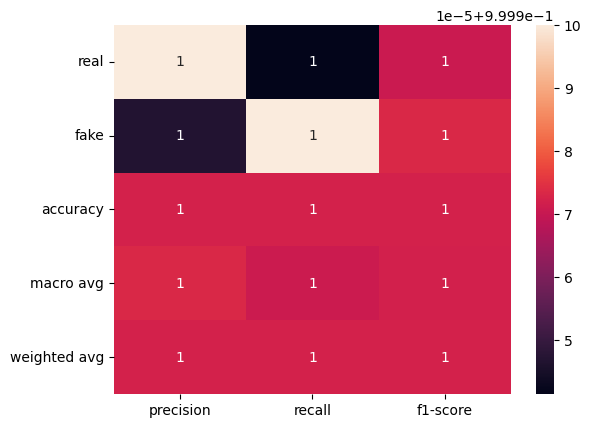

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

categories=['real','fake']
report = classification_report(y_train,y_pred_train,target_names=categories,digits=4,output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)
plt.show()

In [24]:
# Classification report for testing data
print(classification_report(y_test,y_pred_test,target_names=categories,digits=4))

              precision    recall  f1-score   support

        real     0.9945    0.9975    0.9960      4330
        fake     0.9976    0.9948    0.9962      4650

    accuracy                         0.9961      8980
   macro avg     0.9961    0.9961    0.9961      8980
weighted avg     0.9961    0.9961    0.9961      8980



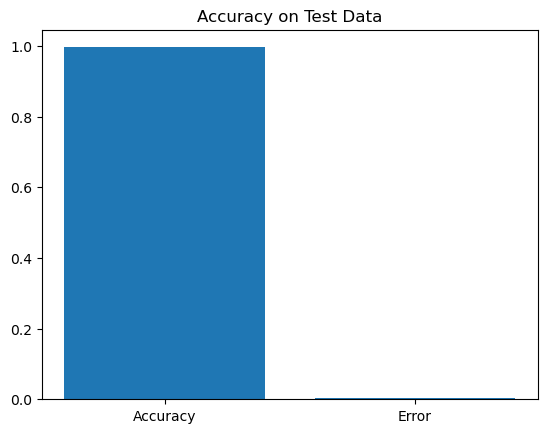

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_test)

labels = ['Accuracy', 'Error']
values = [accuracy, 1 - accuracy]

fig, ax = plt.subplots()
ax.bar(labels, values)
ax.set_title('Accuracy on Test Data')
plt.show()

In [ ]:
Conclusion

In conclusion, the model is highly accurate and performs very well on the data it was trained and tested on.
It can predict outcomes with 99% accuracy and has high recall and precision scores, 
indicating its ability to identify relevant results and minimize incorrect results.



